In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dfcars = pd.read_excel(r"C:\Users\mahesh mahajan\Desktop\data set\Car Price\Cardekho Dataset.xlsx")

In [3]:
dfcars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
dfcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
dfcars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [6]:
# Dependent Variable - selling_price
# Research Objective - Build a model that predicts price of a car when data is input

In [7]:
dfcars.max_power.head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [8]:
dfcars.rename(columns={'mileage(km/ltr/kg)': 'mileage'}, inplace=True)

In [9]:
pd.set_option("display.max_rows",322)
dfcars.max_power.value_counts()

74         377
88.5       222
81.8       220
67         165
46.3       162
67.1       151
88.7       148
67.04      145
62.1       141
47.3       141
70         141
88.73      132
81.86      131
120        131
140        128
68         127
88.76      124
73.9       124
55.2       121
98.6       118
67.05      117
190        110
82         108
75         108
63         100
81.83       97
85.8        94
37          92
100         90
100.6       87
78.9        85
102         84
90          82
69          77
126.2       75
68.05       74
88.8        70
74.02       66
177         65
126.32      65
53.3        64
84          63
73.97       61
83.8        58
108.5       57
138.1       55
86.8        51
98.96       49
103.6       48
117.3       47
108.45      46
147.94      45
80          45
83.1        45
121.3       44
62          43
103.5       43
71          43
110         41
99          38
73          38
93.7        34
214.56      34
157.7       33
98.59       32
150         32
69.01     

In [10]:
dfcars["companyname"] = dfcars.name.str.split().str[0]

In [11]:
dfcars.companyname.value_counts(dropna=False)

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: companyname, dtype: int64

In [12]:
dfcars.engine=pd.to_numeric(dfcars.engine,errors="coerce")
# pd.to_numeric() - brute force conversion
# errors = coerce  wherever number is not understood, impute with NA or missingvalue

In [13]:
dfcars.max_power=pd.to_numeric(dfcars.max_power,errors="coerce")

In [14]:
dfcars[['mileage', 'engine', 'max_power','seats']].describe()

,mileage,engine,max_power,seats
count,7907.000000,7907.000000,7912.000000,7907.000000
mean,19.418783,1458.625016,91.517919,5.416719
std,4.037145,503.916303,35.822499,0.959588
min,0.000000,624.000000,0.000000,2.000000
25%,16.780000,1197.000000,68.050000,5.000000
50%,19.300000,1248.000000,82.000000,5.000000
75%,22.320000,1582.000000,102.000000,5.000000
max,42.000000,3604.000000,400.000000,14.000000


<Axes: >

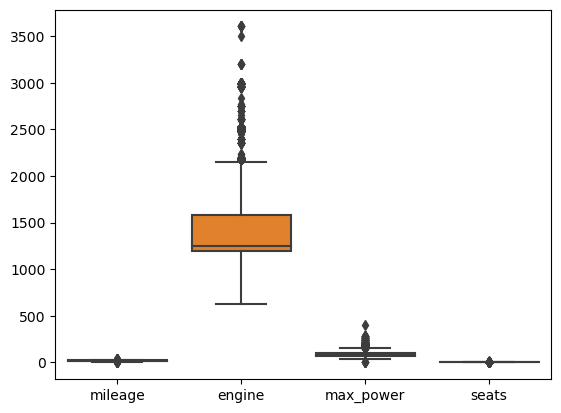

In [15]:
sns.boxplot(dfcars[['mileage', 'engine', 'max_power','seats']])

In [16]:
# Median Imputation of Missing Values
for col in ['mileage', 'engine', 'max_power','seats']:
    dfcars[col]=dfcars[col].fillna(dfcars[col].median())

In [17]:
# Create new variable "Age" based on purchase year as of year 2022
dfcars['age']=2022-dfcars.year

In [18]:
dfcars.age.describe()

count    8128.000000
mean        8.195989
std         4.044249
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        39.000000
Name: age, dtype: float64

In [19]:
dfcars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'companyname', 'age'],
      dtype='object')

In [20]:
dfcars = dfcars.drop(["name", "year"], axis=1)

In [21]:
# Data Vizualization
# Frequency Counts and Pie Diagram with percentage for variables fuel, seller_type,
# owner
# Cross Tabulation and Stacked Bar Plot for variables fuel & seller_type, owner & fuel
# companyname & fuel
# Bar plot of companyname
# Histogram, Boxplot and Density Curve - selling_price, km_driven, mileage

<Axes: ylabel='fuel'>

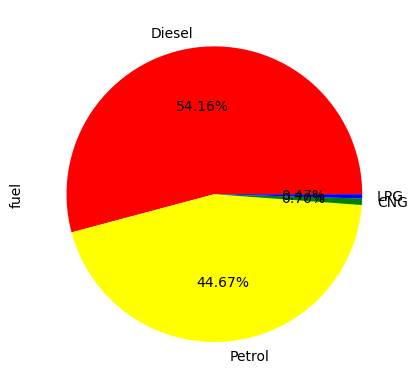

In [22]:
dfcars.fuel.value_counts().plot(kind="pie",autopct="%.2f%%", colors=["red","yellow","green","blue"])

<Axes: ylabel='seller_type'>

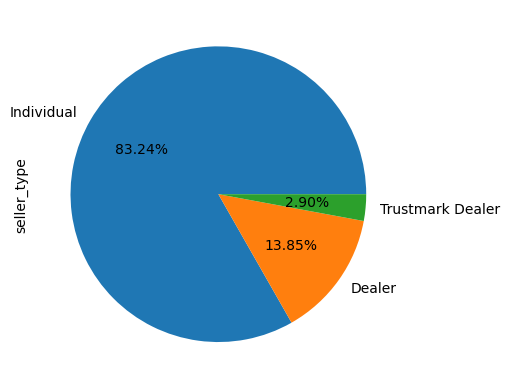

In [23]:
dfcars.seller_type.value_counts().plot(kind = "pie", autopct = "%.2f%%")

<Axes: ylabel='owner'>

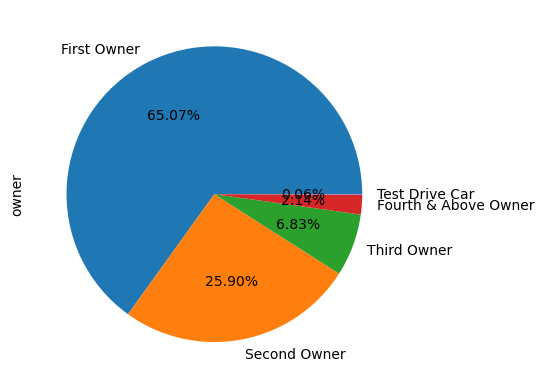

In [24]:
dfcars.owner.value_counts().plot(kind="pie", autopct = "%.2f%%")

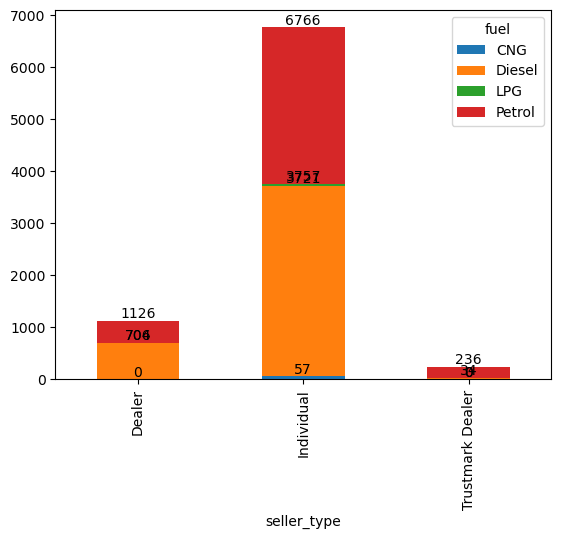

In [25]:
ax = pd.crosstab(dfcars.seller_type, dfcars.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

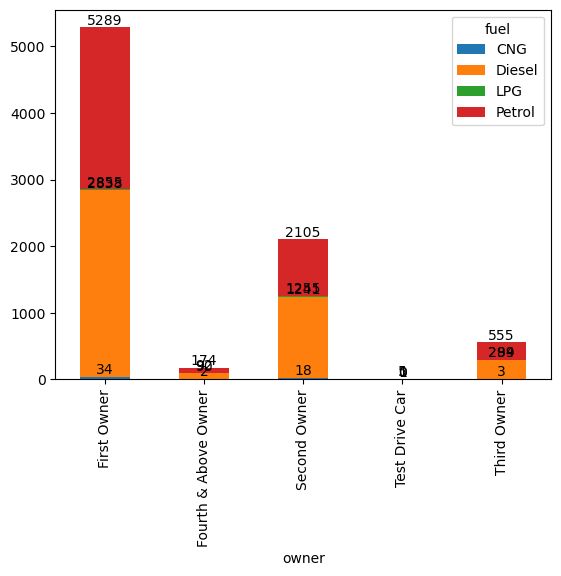

In [26]:
ax = pd.crosstab(dfcars.owner, dfcars.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

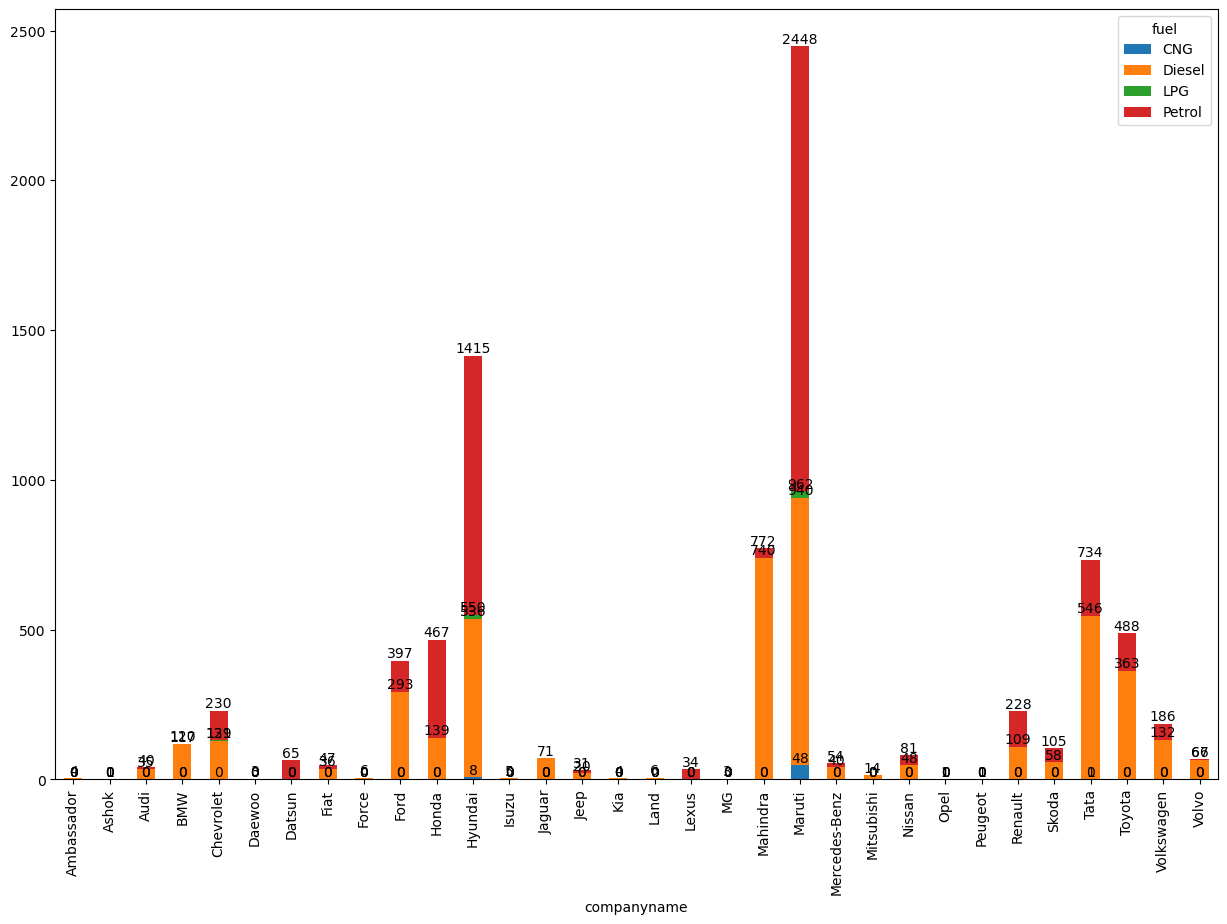

In [27]:
ax=pd.crosstab(dfcars.companyname,dfcars.fuel).plot(kind="bar",
                                                        stacked=True,figsize=(15,10))
for i in ax.containers:
    ax.bar_label(i)

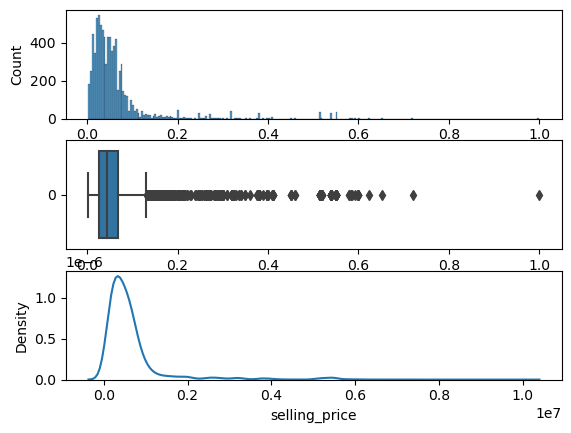

In [28]:
fig,ax=plt.subplots(3,1)
sns.histplot(dfcars.selling_price,ax=ax[0])
sns.boxplot(dfcars.selling_price,ax=ax[1],orient="h")
sns.kdeplot(dfcars.selling_price,ax=ax[2])
plt.show()

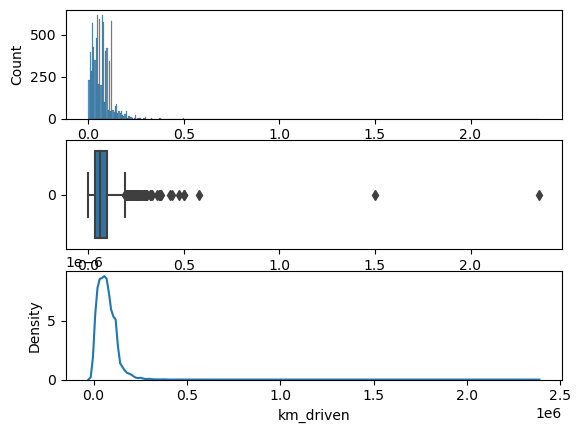

In [29]:
fig,ax=plt.subplots(3,1)
sns.histplot(dfcars.km_driven,ax=ax[0])
sns.boxplot(dfcars.km_driven,ax=ax[1],orient="h")
sns.kdeplot(dfcars.km_driven,ax=ax[2])
plt.show()

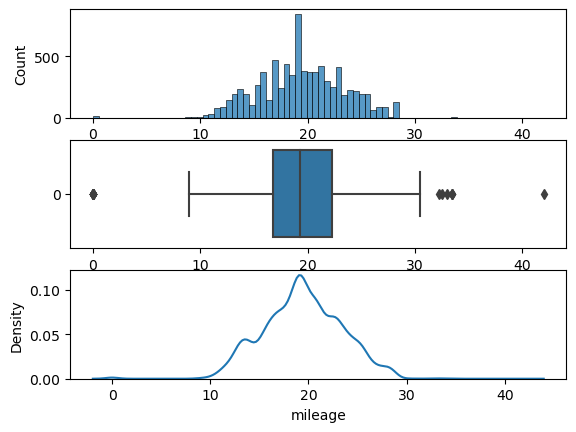

In [30]:
fig,ax=plt.subplots(3,1)
sns.histplot(dfcars.mileage,ax=ax[0])
sns.boxplot(dfcars.mileage,ax=ax[1],orient="h")
sns.kdeplot(dfcars.mileage,ax=ax[2])
plt.show()

In [31]:
# Hypothesis Testing - Comparision of Means/Averages of 2 or more than 3 levels/groups/classes
# Fundamental Assumption - Means/Averages must be different

# Variable 1 Numerical and Variable 2 categorical with exactly 2 levels/groups/classes-
# 2 Sample Independent T test

# # Variable 1 Numerical and Variable 2 categorical with morethan 2 levels/groups/classes-
# Anova Single Factor

# Variable 1 Categorical and Variable 2 categorical - Chi Square Test of Independence

# Variable 1 Numeric and Before and Variable 2 Numeric and After - Paired Sample T test

# Process of Conducting Hypothesis Test
# 1) groupby() - mean and variance
# 2) Frame Null and Alternate Hypothesis
# 3) Split Data into as many levels
# 4) Conduct Test and interpret based on p-value

# p-value interpretation - 2 tail test (rejection on Both Sides)
# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject (Accept) Null
# 0.05 means 5% Alpha(probable error rate) and 95% Confidence Level

In [32]:
# Test Null Average selling_price of different transmission is equal
np.round(dfcars.selling_price.groupby(dfcars.transmission).mean(),2)
# Since exactly 2 levels/groups/classes - 2 Sample Independent T Test

transmission
Automatic    1870827.60
Manual        455425.86
Name: selling_price, dtype: float64

In [33]:
np.round(dfcars.selling_price.groupby(dfcars.transmission).var(),2)

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [34]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average selling_price of auto & manual cars
# H0 - meanof auto = mean of manual

# Alt - There is Significant difference in Average selling_price of auto & manual cars
# Ha - meanof auto != mean of manual

In [35]:
# Split Data into auto and manual
auto=dfcars[dfcars.transmission=="Automatic"]
manual=dfcars[dfcars.transmission=="Manual"]

In [36]:
from scipy.stats import ttest_ind

In [37]:
ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

Ttest_indResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129)

In [38]:
# Test Null Average km_driven for auto and manual cars equal
# groupby() - mean & var, Frame Null & Alt, Conduct test & interpret
dfcars.km_driven.groupby(dfcars.transmission).mean()

transmission
Automatic    40276.086667
Manual       74202.188895
Name: km_driven, dtype: float64

In [39]:
dfcars.km_driven.groupby(dfcars.transmission).var()

transmission
Automatic    1.250228e+09
Manual       3.338416e+09
Name: km_driven, dtype: float64

In [40]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average km_driven of auto & manual cars
# Alt - There is Significant difference in Average km_driven of auto & manual cars

In [41]:
ttest_ind(auto.km_driven,manual.km_driven,equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null

Ttest_indResult(statistic=-26.31311123939943, pvalue=2.851791533885484e-131)

In [42]:
# Test Null Average mileage of auto and manual cars equal

In [43]:
dfcars.mileage.groupby(dfcars.transmission).mean()

transmission
Automatic    17.579638
Manual       19.687906
Name: mileage, dtype: float64

In [44]:
dfcars.mileage.groupby(dfcars.transmission).var()

transmission
Automatic    15.773254
Manual       15.295890
Name: mileage, dtype: float64

In [45]:
## Frame Null and Alternate Hypothesis
## Null - There is no significant differnce in average mileage of auto & manual cars
## Alternate - There is a significant difference in average of auto & manual cars

In [46]:
ttest_ind(auto.mileage, manual.mileage, equal_var=False)
##Since pvalue=1.924423779471943e-53 is less than 0.05, Reject NUll

Ttest_indResult(statistic=-16.08325308774936, pvalue=1.924423779471943e-53)

In [47]:
# Test Null Average selling_price for different fuel is equal
dfcars.selling_price.groupby(dfcars.fuel).mean()
# More than 2 levels/groups/classes - Anova Single Factor

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [48]:
## Frame null and alternate hypothesis
## NUll : There is no Significant difference in AVerage selling_price of different fuel cars
## Alternate : There is Significant difference in average selling_price of different fuel cars 

In [49]:
# Split Data
cng=dfcars[dfcars.fuel=="CNG"]
diesel=dfcars[dfcars.fuel=="Diesel"]
lpg=dfcars[dfcars.fuel=="LPG"]
petrol=dfcars[dfcars.fuel=="Petrol"]

In [50]:
from scipy.stats import f_oneway

In [51]:
f_oneway(cng.selling_price,diesel.selling_price,lpg.selling_price,petrol.selling_price)
# Since pvalue=7.768067697277526e-78 is less than 0.05, Reject Null

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

In [52]:
# Test Null Avearge mileage of different fuel cars equal
dfcars.mileage.groupby(dfcars.fuel).mean()

fuel
CNG       23.824211
Diesel    19.634607
LPG       18.634211
Petrol    19.088956
Name: mileage, dtype: float64

In [53]:
# Frame Null & Alternate
# Null - There is no Significant difference in Average mileage of different fuel cars
# Alt - There is Significant difference in Average mileage of different fuel cars

In [54]:
f_oneway(cng.mileage,diesel.mileage,lpg.mileage,petrol.mileage)
# Since pvalue=1.218592729218157e-23 is less than 0.05, Reject Null

F_onewayResult(statistic=36.842275392000154, pvalue=1.218592729218157e-23)

In [55]:
# Both Variables Categarical - Chi Square Test of Independence
# Input of Chisquare Test is Cross Tabulation. Cross Tabulation is frequency table of
# 2 Non Numeric Categorical Variables.

# Test Null No Association between fuel and transmission

pd.crosstab(dfcars.transmission,dfcars.fuel)

fuel,CNG,Diesel,LPG,Petrol
transmission,,,,
Automatic,0,534,0,516
Manual,57,3868,38,3115


In [56]:
# Null - There is no Association between both variables
# Alt - There is Association between both variables

In [57]:
from scipy.stats import chi2_contingency

In [58]:
chi2_contingency(pd.crosstab(dfcars.transmission,dfcars.fuel))
# Since pvalue=6.801498516561924e-05 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,  568.66387795,    4.90895669,  469.06373031],
       [  49.63656496, 3833.33612205,   33.09104331, 3161.93626969]]))

In [59]:
# Test Null No Association between fuel and seller_type
pd.crosstab(dfcars.fuel,dfcars.seller_type)

seller_type,Dealer,Individual,Trustmark Dealer
fuel,,,
CNG,0,57,0
Diesel,704,3664,34
LPG,2,36,0
Petrol,420,3009,202


In [60]:
# Null - There is no Association between both variables
# Alt - There is Association between both variables

In [61]:
chi2_contingency(pd.crosstab(dfcars.fuel,dfcars.seller_type))
# Since pvalue=1.2641980292155646e-40 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=200.82868982394092, pvalue=1.2641980292155646e-40, dof=6, expected_freq=array([[7.89640748e+00, 4.74485728e+01, 1.65501969e+00],
       [6.09824311e+02, 3.66436171e+03, 1.27813976e+02],
       [5.26427165e+00, 3.16323819e+01, 1.10334646e+00],
       [5.03015010e+02, 3.02255733e+03, 1.05427657e+02]]))

In [62]:
# T Test -Students T Distribution
# Anova - F Distribution
# ChiSquare - Chi Distribution

In [63]:
dfcars.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'companyname',
       'age'],
      dtype='object')

In [64]:
dfcars=pd.get_dummies(dfcars,columns=['fuel', 'seller_type', 'transmission','owner', 'seats', 'companyname'])

In [65]:
pd.set_option("display.max_columns",62)

In [66]:
dfcars.head()

,selling_price,km_driven,mileage,engine,max_power,age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,companyname_Ambassador,companyname_Ashok,companyname_Audi,companyname_BMW,companyname_Chevrolet,companyname_Daewoo,companyname_Datsun,companyname_Fiat,companyname_Force,companyname_Ford,companyname_Honda,companyname_Hyundai,companyname_Isuzu,companyname_Jaguar,companyname_Jeep,companyname_Kia,companyname_Land,companyname_Lexus,companyname_MG,companyname_Mahindra,companyname_Maruti,companyname_Mercedes-Benz,companyname_Mitsubishi,companyname_Nissan,companyname_Opel,companyname_Peugeot,companyname_Renault,companyname_Skoda,companyname_Tata,companyname_Toyota,companyname_Volkswagen,companyname_Volvo
0,450000,145500,23.40,1248.0,74.00,8,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,8,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,158000,140000,17.70,1497.0,78.00,16,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,1396.0,90.00,12,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,15,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# distribution of dependent variable(y) decides whether to use Regression or Classification
# Regression Algorithms - Dependent Variable (y) is numerical, continuos, closer to
# normal distribution(bell curve), with minimum outliers, and no missing values.

# Classification Algorithsm - Dependent Variable(y) is non numeric either binary(yes/no) or
# multinomial (more than 2 levels/classes/gorups)

# Multiple Linear Regression explains linear relationship between dependent variable(y) and
# multiple independent variables(X's). Multiple Linear Regression is an equation

# y = B0+B1X1+B2X2+B3X3+B4X4 + ........... +BnXn+Et
# y - Dependent Variable or Predicted Variable
# Bo - Intercept or Constant (point at which straight line touched y axis)
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,,,,Xn - Independent Variables or Predictors
# Et - Error term or Residual=ActualValue - PredictedValue

# Assumptions - MLR is parametric Algorithm(many assumptions) - Pre Model
# 1) Dependent Variable y must be numerical,continuous, closer to normal distribution with
# minimum outliers and no missing values
# 2) Independent Variabels(X's) can be both numerical and nonnumeric categorical
# 3) No Multicollinearity - Multicollinearity is very strong correlation(>0.90) among
# variables. If multicollinearity is found do not include both variables choose .

# Post Model Assumptions
# 7) Residuals must be normally distributed. Check using Q-Q plot
# 8) Residuals must be homosceadstic in nature


# Interpretation of Output (Python Only)
# R Square must be between 0.60 - 0.95. R SQuare explains amount of variance occuring in
# dependent variable caused by independent variables or model.
# less than 0.60 - Underfitting
# greater than 0.95 - Overfitting

# Intercept + Coefficients for creating predictive equation

# Statistical Interpretation of Output
# 1) Adjusted R Square must be between 0.60 - 0.95. Adj R Square is sensitive to independent
# variable significance, if independent variable is significant it will increase and if
# variable is insignificant it will decrease.

# 2) model p-value(lies below Adjusted R SQuare) or Significance F in MS Excel must be
# less than 0.05. Reject Null
# Null - Coefficients(B's) are equal to Zero
# Alt - Coefficients(B's) are not equal to Zero

# 3) Independent Variables(X's) p-value must be less than 0.05. Reject Null
# Null - Independent Variable is Insignificant
# Alt - Independent Variable is Significant

In [68]:
dfcars.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2.0', 'seats_4.0',
       'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0', 'seats_9.0',
       'seats_10.0', 'seats_14.0', 'companyname_Ambassador',
       'companyname_Ashok', 'companyname_Audi', 'companyname_BMW',
       'companyname_Chevrolet', 'companyname_Daewoo', 'companyname_Datsun',
       'companyname_Fiat', 'companyname_Force', 'companyname_Ford',
       'companyname_Honda', 'companyname_Hyundai', 'companyname_Isuzu',
       'companyname_Jaguar', 'companyname_Jeep', 'companyname_Kia',
       'companyname_Land', 'companyname_Lexus', 'companyname_MG',
   

In [69]:
# Check for Multicollinearity
dfcars[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age']].corr() # No Multicollinearity

,selling_price,km_driven,mileage,engine,max_power,age
selling_price,1.000000,-0.225534,-0.125040,0.458345,0.747935,-0.414092
km_driven,-0.225534,1.000000,-0.171746,0.198911,-0.040599,0.418006
mileage,-0.125040,-0.171746,1.000000,-0.574128,-0.372897,-0.311657
engine,0.458345,0.198911,-0.574128,1.000000,0.703612,-0.035851
max_power,0.747935,-0.040599,-0.372897,0.703612,1.000000,-0.224704
age,-0.414092,0.418006,-0.311657,-0.035851,-0.224704,1.000000


<Axes: >

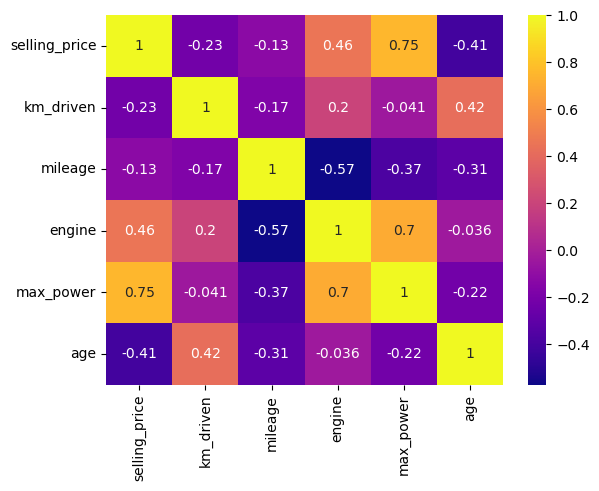

In [70]:
sns.heatmap(dfcars[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power','age']].corr(),annot=True,cmap="plasma")

In [71]:
# Split Data into Dependent Variable(y) and Independent Variables(X)
y=dfcars.selling_price
X=dfcars.drop("selling_price",axis=1)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
reg_mod = LinearRegression().fit(X,y)

In [74]:
reg_mod.score(X,y)

0.8545731690121141

In [75]:
# R Square -0.8551297833952861
# 85.51% variance in selling_price(y) is explained by this model

In [76]:
reg_mod.intercept_

1364267.0501897852

In [77]:
print(list(zip(X.columns,reg_mod.coef_)))

[('km_driven', -0.6192780739537413), ('mileage', 482.5197794294802), ('engine', 53.94119479830988), ('max_power', 6552.933600487457), ('age', -43730.480591997155), ('fuel_CNG', -92553.1618446298), ('fuel_Diesel', 36673.51206626475), ('fuel_LPG', 97271.87637182185), ('fuel_Petrol', -41392.22659378243), ('seller_type_Dealer', 40789.67805692641), ('seller_type_Individual', -18701.426700469165), ('seller_type_Trustmark Dealer', -22088.251356574707), ('transmission_Automatic', 47224.585206872594), ('transmission_Manual', -47224.58520684749), ('owner_First Owner', -471298.95166056603), ('owner_Fourth & Above Owner', -492143.47159573634), ('owner_Second Owner', -526296.1923821453), ('owner_Test Drive Car', 1991969.72109034), ('owner_Third Owner', -502231.1054517361), ('seats_2.0', -64221.52217190686), ('seats_4.0', 320804.48942602135), ('seats_5.0', -51778.62490441711), ('seats_6.0', -128196.64594417764), ('seats_7.0', -4178.765887501941), ('seats_8.0', -72906.00165325287), ('seats_9.0', 2622

In [78]:
reg_pre = reg_mod.predict(X) ## Predicted selling price

In [79]:
# Residual = Actual selling_price - Predicted selling_price
regresid=y-reg_pre

In [80]:
# Root Mean Square Error (RMSE) - Diagnostic for all Regression Algorithms
np.sqrt(np.mean(regresid**2)) # RMSE - 306855.8435

307444.7728539159

In [81]:
print("Skewness",y.skew())
print("Kurtosis",y.kurt())

Skewness 4.193533440675855
Kurtosis 21.081289012186755


In [82]:
# Dependent Variable - has Skewness and Kurtosis - Not Closer to Normal Distribution
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation

<Axes: ylabel='Density'>

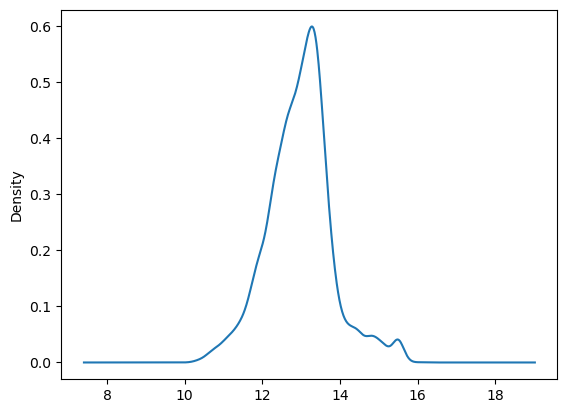

In [83]:
np.log(y).plot(kind="density")

In [84]:
# Log Linear Model
regmodel2=LinearRegression().fit(X,np.log(y))

In [85]:
regmodel2.score(X,np.log(y))

0.9096184444841959

In [86]:
regmodel2_predict=regmodel2.predict(X)

In [87]:
regmodel2_predict=np.exp(regmodel2_predict)

In [88]:
regmodel2_resid=y-regmodel2_predict

In [89]:
np.sqrt(np.mean(regmodel2_resid**2))

207902.3896183564

In [90]:
np.round(dfcars.selling_price.describe(),2)

count        8128.00
mean       638271.81
std        806253.40
min         29999.00
25%        254999.00
50%        450000.00
75%        675000.00
max      10000000.00
Name: selling_price, dtype: float64

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
treemodel=DecisionTreeRegressor(max_depth=8).fit(X,y)

In [93]:
treemodel.score(X,y)

0.9784730040725945

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
cross_val_score(treemodel, X, y)

array([0.93804972, 0.94438655, 0.96253382, 0.9116868 , 0.92293511])

In [96]:
np.mean([0.95024703, 0.94278707, 0.96110752, 0.91510236, 0.93778291])

0.941405378

In [97]:
treepredict=treemodel.predict(X)

In [98]:
treeresid=y-treepredict

In [99]:
np.sqrt(np.mean(treeresid**2))

118286.87481224751

In [100]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [101]:
rules = get_rules(treemodel,X.columns,y)
for r in rules:
    print(r)

if (max_power <= 172.915) and (max_power <= 147.97) and (age > 8.5) and (max_power <= 98.145) and (age <= 11.5) and (max_power > 73.4) and (seats_7.0 <= 0.5) and (mileage <= 23.3) then class: 450000 (proba: 100.0%) | based on 580 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age <= 8.5) and (max_power <= 87.0) and (max_power > 69.505) and (age <= 5.5) and (engine <= 1223.5) and (mileage <= 22.92) then class: 450000 (proba: 100.0%) | based on 525 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age > 8.5) and (max_power <= 98.145) and (age > 11.5) and (age <= 14.5) and (max_power > 62.55) and (companyname_BMW <= 0.5) then class: 450000 (proba: 100.0%) | based on 495 samples
if (max_power <= 172.915) and (max_power <= 147.97) and (age > 8.5) and (max_power <= 98.145) and (age <= 11.5) and (max_power <= 73.4) and (engine <= 2223.5) and (engine > 996.5) then class: 450000 (proba: 100.0%) | based on 426 samples
if (max_power <= 172.915) and (max_power <= 1

In [102]:
pd.DataFrame(X.columns,treemodel.feature_importances_,).sort_index(ascending=False)

,0
0.741540,max_power
0.195802,age
0.015198,engine
0.012385,mileage
0.011011,km_driven
0.005073,seats_4.0
0.003433,companyname_Land
0.002610,companyname_Mercedes-Benz
0.002441,companyname_Ford
0.002160,fuel_Petrol


In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
RF=RandomForestRegressor(n_estimators=1000).fit(X,y)

In [105]:
RF.score(X,y)

0.9958427953159158

In [106]:
RFpred = RF.predict(X)

In [107]:
RFresid = y-RFpred

In [108]:
np.sqrt(np.mean(RFresid**2))

51981.10978513397

In [109]:
pd.DataFrame(np.round(RF.feature_importances_,2),
             X.columns).sort_values(by=0,ascending=False)

,0
max_power,0.72
age,0.20
km_driven,0.02
engine,0.01
mileage,0.01
companyname_Hyundai,0.00
companyname_Kia,0.00
companyname_Jeep,0.00
companyname_Jaguar,0.00
companyname_Isuzu,0.00
